In [1]:
import torch
import random
import matplotlib.pyplot as plt

from encoder_model import EncoderModelV0,EncoderModelV1
from decoder_model import DecoderModelV0
from auto_encoder_model import AutoEncoderModelV0,VariationalAutoEncoderModelV0
from load_data import test_dataloader,train_data
from settings import (ZDIM,MODEL_SAVE_PATH)

In [2]:
encoder_model = EncoderModelV1(ZDIM)
decoder_model = DecoderModelV0(ZDIM)

auto_encoder_model = VariationalAutoEncoderModelV0(encoder_model,decoder_model)

In [3]:
auto_encoder_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

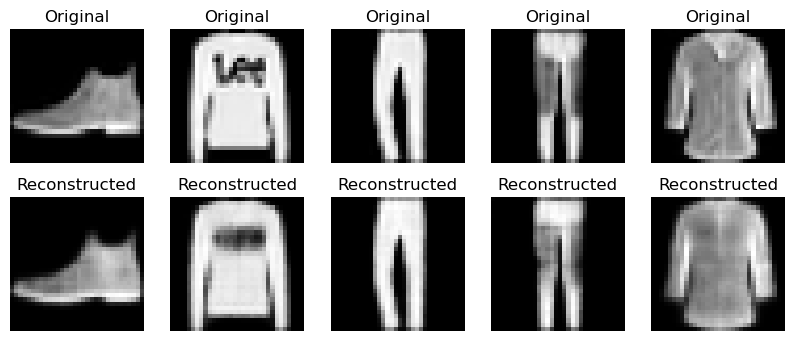

In [4]:
with torch.no_grad():
    examples = next(iter(test_dataloader))
    inputs = examples[0]
    _,_,reconstructions = auto_encoder_model(inputs)

    plt.figure(figsize=(10, 4))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(inputs[i].squeeze().cpu().numpy(), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        plt.subplot(2, 5, i + 6)
        plt.imshow(reconstructions[i].squeeze().cpu().numpy(), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

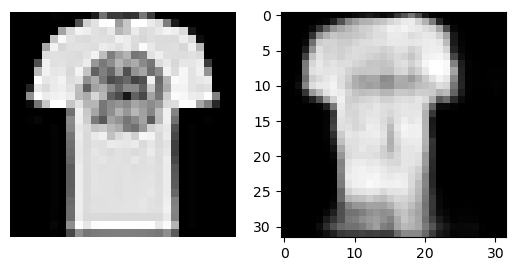

In [13]:
# Predictions
idx = random.randint(0, len(train_data.data))
img = train_data.data[idx].unsqueeze(dim=0).unsqueeze(dim=0).type(torch.float)
with torch.inference_mode():
    _,_,pred = auto_encoder_model(img)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img.squeeze(), cmap="gray")
axs[0].axis("off")
axs[1].imshow(pred.squeeze(), cmap="gray")
axs[0].axis("off")
plt.show()